In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil, cos, sin
plt.xkcd()

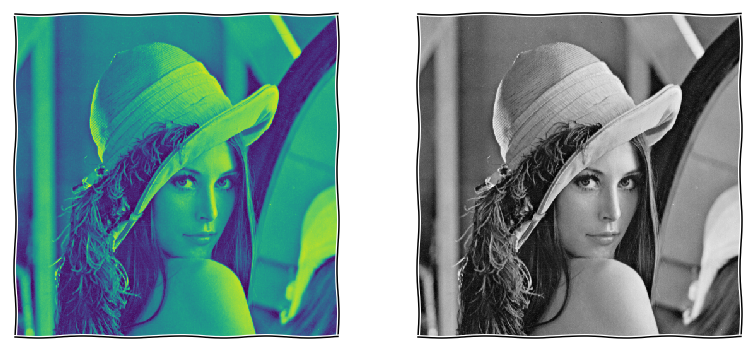

In [2]:
img = mpimg.imread('../img/lena_gray.png')
fig, ax = plt.subplots(1, 2, figsize=(13,13),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
ax[0].imshow(img)
ax[1].imshow(img, cmap='gray')

Question 1
---------------
Download Lena image(grayscale), say f. Generate 100 noisy versions of f by adding Gaussian noise, and find the average of noisy images and display the same.

In [3]:
# helper functions
def add_gaussian_noise(img, mean=0, std_dev=0.1):
    """ Adds gaussian noise to the given image 
    img : Image data with float values in range 0, 1
    mean : mean value of the noise being added
    std_dev : standard deviation of the noise being added
    """
    noise = np.random.normal(mean, std_dev, img.shape)
    noisy_img = np.clip(img + noise, 0, 1)
    return noisy_img

def add_salt_and_pepper_noise(img, amount):
    """ Adds salt and pepper noise to the given image
    img : Image data with float values in range 0, 1
    amount : percent of pixels to be affected
    """
    # for single channel image
    if len(img.shape) == 2:
        noisy_img = np.copy(img)
        # add pepper
        noise_location = np.random.random(noisy_img.shape) < (amount/2)
        noisy_img[noise_location] = 1.0
        # add salt
        noise_location = np.random.random(noisy_img.shape) < (amount/2)
        noisy_img[noise_location] = 0.0
        
        return noisy_img
    
def median_filter(img, size):
    """ Applies median filter over the img
    img : Image data with float values in range 0, 1
    size : size of the filter, if size is n, then n x n filter will be used
           size should be an odd integer
           
    Applies a pad of intensity 0 to input image based on filter size and then applies median filter,
    returns the cropped image as output.
    """
    
    if size%2 == 0:
        raise ValueError('Expected size to be an odd integer.')
    
    # create placeholder
    irows = img.shape[0]
    icols = img.shape[1]
    pad = size//2 # img pad size
    i = np.zeros((irows + (2*pad), icols + (2*pad)))  # padded placeholder
    
    # copy original image
    padrows = i.shape[0]
    padcols = i.shape[1]
    i[pad : padrows - pad, pad : padcols - pad] = img  # copy of original image with padding
    originx, originy = pad, pad 
    
    # output holder
    output = np.copy(i)

    #for ix, iy in np.ndindex(i.shape):
    for ix in range(irows):
        for iy in range(icols):
            shiftedx = originx + ix
            shiftedy = originy + iy
            output[shiftedx, shiftedy] = np.median(i[shiftedx + (-pad): shiftedx + pad + 1, 
                                                     shiftedy + (-pad): shiftedy + pad + 1])
            
    # crop the output of input image size
    output = output[pad : padrows - pad, pad : padcols - pad]
        
    return output

Text(0.5, 1.0, 'Lena average')

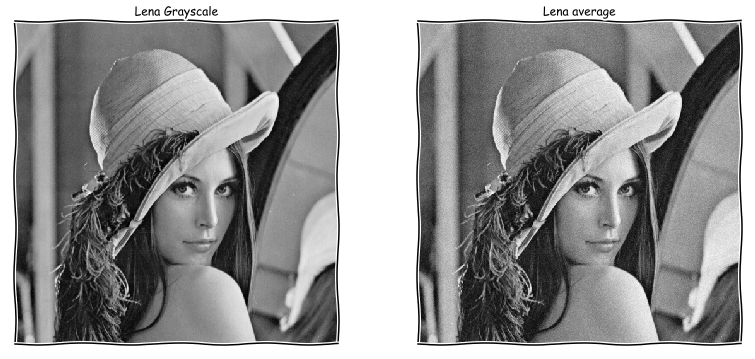

In [4]:
# original image
fig, ax = plt.subplots(1,2, figsize=(13,13),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Lena Grayscale')

noisy_images = list()
for i in range(100):
    nimg =  add_gaussian_noise(img, 0, 0.2)
    noisy_images.append(nimg)

avg = np.zeros(img.shape)
for nimg in noisy_images:
    avg += nimg
avg /= len(noisy_images)

ax[1].imshow(avg, cmap='gray')
ax[1].set_title('Lena average')

Question 2
---------------
Use the new Lena image (unprocessed), add salt and pepper noise to it. Use median filters of sizes 3x3, 5x5, 7x7 to remove that noise.

Text(0.5, 1.0, 'After median filter of size 7')

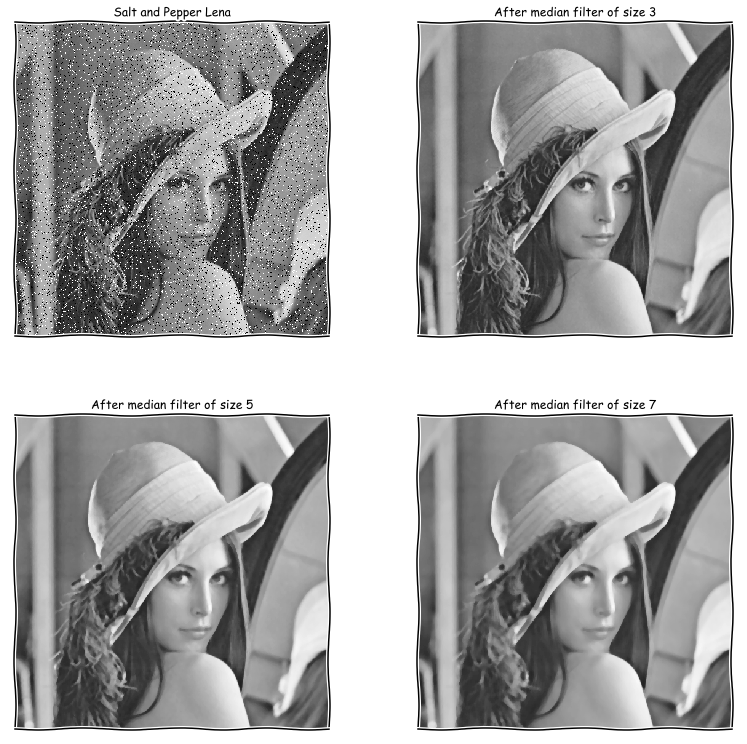

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(13,13),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
nimg = add_salt_and_pepper_noise(img, 0.1)
ax[0,0].imshow(nimg, cmap='gray')
ax[0,0].set_title('Salt and Pepper Lena')

# use median filter
fimg3 = median_filter(img, 3)
ax[0,1].imshow(fimg3, cmap='gray')
ax[0,1].set_title('After median filter of size 3')

fimg5 = median_filter(img, 5)
ax[1,0].imshow(fimg5, cmap='gray')
ax[1,0].set_title('After median filter of size 5')

fimg7 = median_filter(img, 7)
ax[1,1].imshow(fimg7, cmap='gray')
ax[1,1].set_title('After median filter of size 7')

Question 3
---------------
Download leaning tower of PISA image(grayscale), and find the angle of inclination (use bilinear interpolation while rotating).

In [6]:
# rotation
def rotate_pisa(img, angle):
    ''' Rotates the pisa image by the given angle using bilinear interpolation.
    img : Image data.
    angle : angle in radians
    
    the centre of rotation is the centre of the image
    '''
    
    if len(img.shape) != 2:
        ValueError('Image is not a single channel image. Expected single channel image.')
        
    rows, cols = img.shape
    originx, originy = rows//2, cols//2
    oimg = np.zeros(img.shape)
    orows, ocols = img.shape
    # we rotate by -ve of angle because we go from the final image to the original
    angle = -angle
    for ix in range(orows):
        for iy in range(ocols):
            coordx = ix - originx
            coordy = iy - originy
            xprime = originx + ( (coordx * cos(angle)) - (coordy * sin(angle)) )
            yprime = originy + ( (coordx * sin(angle)) + (coordy * cos(angle)) )
            
            if 0 <= xprime <= (rows-1) and 0 <= yprime <= (cols-1):
                # oimg[ix, iy] = img[floor(xprime), floor(yprime)] # simple rotation
                flr_x, flr_y = floor(xprime), floor(yprime)
                cl_x, cl_y = ceil(xprime), ceil(yprime)
                H, W = xprime - flr_x, yprime - flr_y
                I00 = img[flr_x, flr_y]
                I01 = img[flr_x, cl_y ]
                I10 = img[cl_x , flr_y]
                I11 = img[cl_x , cl_y ]
                oimg[ix, iy] = (1-H)*( (1-W)*I00 + W*I01 ) + H*( ((1-W)*I01) + (W*I11) )
    return oimg

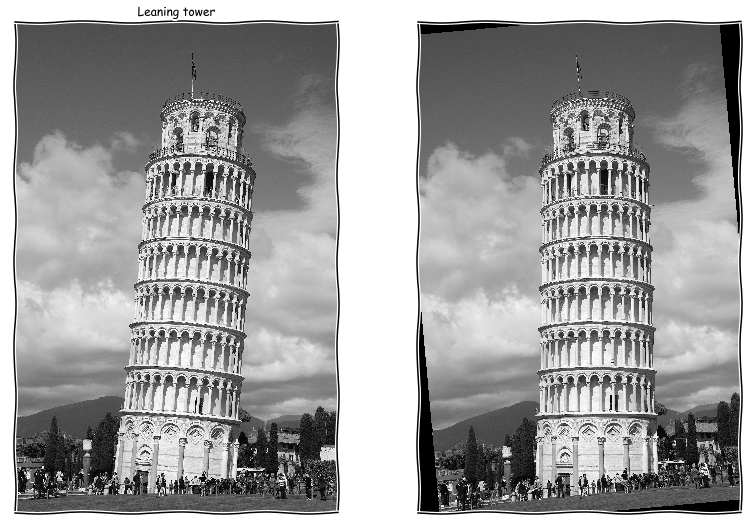

In [7]:
i = mpimg.imread('../img/leaning_tower.jpg')
fig, ax = plt.subplots(1,2, figsize=(13,13),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
ax[0].imshow(i, cmap='gray')
ax[0].set_title('Leaning tower')

#rotate
g = rotate_pisa(i, 0.09) # angle of ratation: 0.09 radians
ax[1].imshow(g, cmap='gray')
mpimg.imsave('l.png', g, cmap='gray')

Question 4
---------------
Download cameraman image and do the following( in each, use nearest neighbor interpolation and bi-linear interpolation, and compare the results):
1. Scale it by 0.5 and display.
2. Scale it by 2 and display.
3. convert to the image of size 200x200 and display.

In [8]:
'''
### THIS IS WRT MATLAB, JUST UNDERSTAND THE CONCEPT

1           c         1                 scaleC*c
+-----------+ 1       +----------------------+ 1
|    |      |         |        |             |
|----o      |   <===  |        |             |
|  (ii,jj)  |         |--------o             |
+-----------+ r       |      (i,j)           |
  inputImage          |                      |
                      |                      |
                      +----------------------+ scaleR*r
                            ouputImage

Note: I am using matrix notation (row/col), so:
  i ranges on [1,scaleR*r] , and j on [1,scaleC*c]
  and ii on [1,r], jj on [1,c]

The idea is that for each location (i,j) in the output image, we want to map it to the "nearest" location in the input image coordinates. Since this is a simple mapping we use the formula that maps a given x to y (given all the other params):

 x-minX      y-minY
--------- = ---------
maxX-minX   maxY-minY

in our case(matlab), x is the i/j coordinate and y is the ii/jj coordinate. Therefore substituting for each gives us:

jj = (j-1)*(c-1)/(scaleC*c-1) + 1
ii = (i-1)*(r-1)/(scaleR*r-1) + 1
'''

def nearest_neighbour_interpolation_factor(img, scale):
    '''Scales image using nearest neighbour interpolation
    img : Image data.
    scale: Scale factor to scale the image by.
    '''
    
    if len(img.shape) != 2:
        raise ValueError('grayscale img expected, with a single channel.')    

    (rows, cols) = img.shape
    oimg = np.zeros(( floor(rows*scale), floor(cols*scale) ))
    orows, ocols = oimg.shape

    for ix in range(orows):
        for iy in range(ocols):
            oimg[ix, iy] = img[ round( ix*((rows-1)/(orows-1)) ) , round( iy*((cols-1)/(ocols-1)) )]

    return oimg

def nearest_neighbour_interpolation_size(img, size):
    '''Scales image using nearest neighbour interpolation
    img : Image data.
    size : size of the output image, tuple (rows, cols)
    '''
    
    if len(img.shape) != 2:
        raise ValueError('grayscale img expected, with a single channel.')    

    (rows, cols) = img.shape
    oimg = np.zeros(size)
    orows, ocols = oimg.shape

    for ix in range(orows):
        for iy in range(ocols):
            oimg[ix, iy] = img[ round( ix*((rows-1)/(orows-1)) ) , round( iy*((cols-1)/(ocols-1)) )]

    return oimg


'''
Bilinear interpolation
  (a, b)       (a, b+1)           
    +----------------+
    |    (H)         |
    |-(W)-+--(1-W)---|
    |     | (p, q)   |
    |     |          |
    |   (1-H)        |
    |     |          |
    |     |          |
    +----------------+
  (a+1, b)      (a+1, b+1)
  
I(p, q) = H * (I(a+1, b)*(1-W) + I(a+1, b+1)*(W)) + (1-H) * (I(a,b)*(1-W) + I(a, b+1)*(W))
        = H * (I10*(1-W) + I11*(W)) + (1-H) * (I00*(1-W) + I01*(W))

'''


def bilinear_interpolation_factor(img, scale):
    '''Scales image using nearest neighbour interpolation
    img : Image data.
    scale: Scale factor to scale the image by.
    '''
    
    if len(img.shape) != 2:
        raise ValueError('grayscale img expected, with a single channel.')    

    (rows, cols) = img.shape
    oimg = np.zeros(( floor(rows*scale), floor(cols*scale) ))
    orows, ocols = oimg.shape

    for ix in range(orows):
        for iy in range(ocols):
            p = ix * ((rows-1)/(orows-1))
            q = iy * ((cols-1)/(ocols-1))
            H = p - floor(p)
            W = q - floor(q)
            
            I00 = img[floor(p), floor(q) ]
            I01 = img[floor(p), ceil(q)  ]
            I10 = img[ceil(p) , floor(q) ]
            I11 = img[ceil(p) , ceil(q)  ]
            
            oimg[ix, iy] = H * (I10*(1-W) + I11*(W)) + (1-H) * (I00*(1-W) + I01*(W))

    return oimg

def bilinear_interpolation_size(img, size):
    '''Scales image using nearest neighbour interpolation
    img : Image data.
    size : size of the output image, tuple (rows, cols)
    '''
    
    if len(img.shape) != 2:
        raise ValueError('grayscale img expected, with a single channel.')    

    (rows, cols) = img.shape
    oimg = np.zeros(size)
    orows, ocols = oimg.shape

    for ix in range(orows):
        for iy in range(ocols):
            p = ix * ((rows-1)/(orows-1))
            q = iy * ((cols-1)/(ocols-1))
            H = p - floor(p)
            W = q - floor(q)
            
            I00 = img[floor(p), floor(q) ]
            I01 = img[floor(p), ceil(q)  ]
            I10 = img[ceil(p) , floor(q) ]
            I11 = img[ceil(p) , ceil(q)  ]
            
            oimg[ix, iy] = H * (I10*(1-W) + I11*(W)) + (1-H) * (I00*(1-W) + I01*(W))

    return oimg

Text(0.5, 1.0, 'scale to 200 x 200')

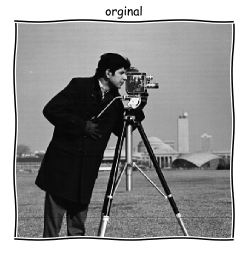

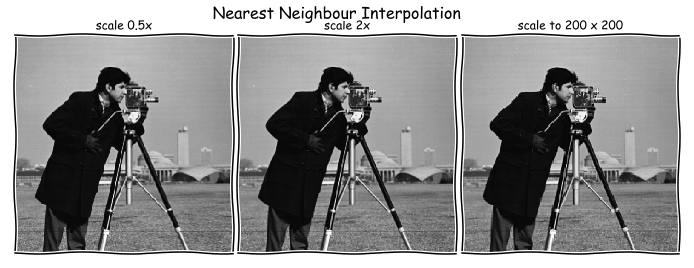

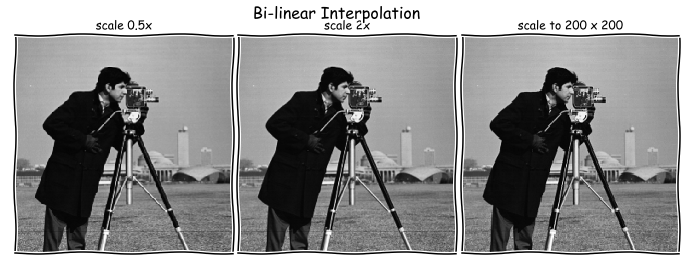

In [9]:
i = mpimg.imread('../img/cameraman.tif')
# original
f,a = plt.subplots(figsize=(12,4),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0, 'hspace':0})
a.imshow(i, cmap='gray')
a.set_title('orginal')

# NEAREST NEIGHBOUR INTERPOLATION
fig, ax = plt.subplots(1,3, figsize=(12,4),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0, 'hspace':0})
fig.suptitle('Nearest Neighbour Interpolation', fontsize=16)

#a
g1 = nearest_neighbour_interpolation_factor(i, 0.5)
ax[0].imshow(g1, cmap='gray')
ax[0].set_title('scale 0.5x')

#b
g2 = nearest_neighbour_interpolation_factor(i, 2)
ax[1].imshow(g2, cmap='gray')
ax[1].set_title('scale 2x')

#c
g3 = nearest_neighbour_interpolation_size(i, (200, 200))
ax[2].imshow(g3, cmap='gray')
ax[2].set_title('scale to 200 x 200')

# BI-LINEAR INTERPOLATION
fig, ax = plt.subplots(1,3, figsize=(12,4),
 subplot_kw={'aspect':'equal', 'xticklabels':[], 'yticklabels':[], 'xticks': [], 'yticks': []}, 
 gridspec_kw = {'wspace':0, 'hspace':0})
fig.suptitle('Bi-linear Interpolation', fontsize=16)

#a
g1 = bilinear_interpolation_factor(i, 0.5)
ax[0].imshow(g1, cmap='gray')
ax[0].set_title('scale 0.5x')

#b
g2 = bilinear_interpolation_factor(i, 2)
ax[1].imshow(g2, cmap='gray')
ax[1].set_title('scale 2x')

#c
g3 = bilinear_interpolation_size(i, (200, 200))
ax[2].imshow(g3, cmap='gray')
ax[2].set_title('scale to 200 x 200')

Question 5
---------------
Find attached pout-dark, pout- bright images,
1. Do histogram equalization on pout-dark and display the same
2. Do histogram matching(specification) on the pout-dark image, keeping pout-bright as a reference image.

In [10]:
# healper functions
def histeq(img):
    '''Performs histogram equalization on the given image
    img : Image data to perform histogram equalization on
    img is a single channel grayscale image with values from 0 to 255
    '''
    intensity_count_hist1 = np.zeros(256)
    for ix, iy in np.ndindex(img.shape):
        intensity_count_hist1[int(img[ix, iy])] += 1
    
    normalized = intensity_count_hist1/np.sum(intensity_count_hist1)
    cumulative_intensity_count = np.cumsum(normalized)
    output_intensity = (255) * cumulative_intensity_count
    
    
    oimg = np.zeros(img.shape)
    intensity_count_hist2 = np.zeros(256)
    for ix, iy in np.ndindex(oimg.shape):
        oimg[ix, iy] = floor(output_intensity[int(img[ix, iy])])
        intensity_count_hist2[int(oimg[ix, iy])] += 1
    
    hist1 = normalized
    hist2 = intensity_count_hist2/np.sum(intensity_count_hist2)
        
    return oimg, hist1, hist2

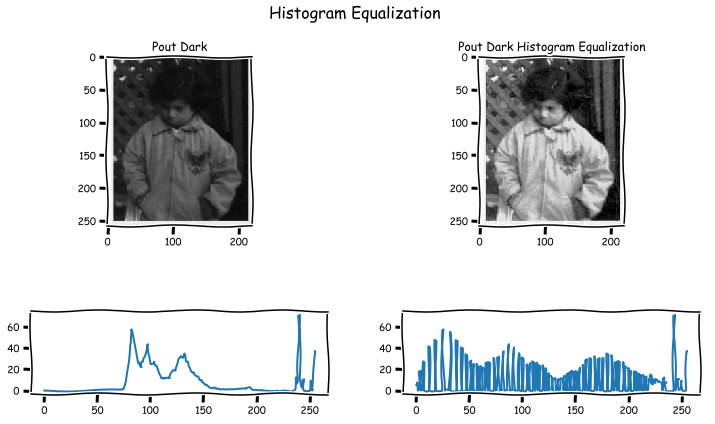

In [11]:
poutd = mpimg.imread('../img/pout-dark.jpg')
poutb = mpimg.imread('../img/pout-bright.jpg')

# single channel image matrix
newpoutd = np.zeros((poutd.shape[0], poutd.shape[1]))
for ix in range(poutd.shape[0]):
    for iy in range(poutd.shape[1]):
        newpoutd[ix, iy] = poutd[ix, iy, 0]

newpoutb = np.zeros((poutb.shape[0], poutb.shape[1]))
for ix in range(poutd.shape[0]):
    for iy in range(poutd.shape[1]):
        newpoutb[ix, iy] = poutb[ix, iy, 0]
        
# a. histogram eq
fig, ax = plt.subplots(2,2, figsize=(12,7),
 subplot_kw={'aspect':'equal'}, 
 gridspec_kw = {'wspace':0.25, 'hspace':0.25})
fig.suptitle('Histogram Equalization', fontsize=16)
ax[0][0].imshow(newpoutd, cmap='gray')
ax[0][0].set_title('Pout Dark')
g, hist1, hist2 = histeq(newpoutd)
ax[0][1].imshow(g, cmap='gray')
ax[0][1].set_title('Pout Dark Histogram Equalization')

ax[1][0].plot(hist1*2048)
ax[1][1].plot(hist2*2048)

#b. histogram matching